In [13]:
from comut import comut
from comut import fileparsers
import palettable
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
maf_path  = '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/filtered_results/common_de_withonlyoncogeneicpathways.maf' # change this to the path of your MAF, e.g. 'mutation.maf'
#genes    = ['CDKN2A', 'TP53', 'NF1', 'NRAS', 'BRAF'] # change this list to the genes you want in the comut, from bottom to top
figsize   = (10,3) # the size of the figure - changes the shape of the squares in the comut
dpi       = 300 # change the output resolution
extension = '.svg' # extension for saving - can otherwise be .pdf, .png, .jpg, etc

# You can provide a list of samples to order your comut (from left to right). If none is provided, it will be calculated from your MAF.
#samples     = None
x_padding   = 0.04 # the x distance between patches in comut
y_padding   = 0.04 # the y distance between patches in comut
tri_padding = 0.03 # the distance between triangles in comut

# mapping of mutation type to color. Only these mutation types are shown. Can be any valid matplotlib color, e.g. 'blue', #ffa500, or (1,1,1).
vivid_10      = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
mut_mapping   = {'MYC': vivid_10[5], 'Hippo': vivid_10[0], 'NOTCH': vivid_10[1],
                'WNT': vivid_10[4], 'RTK-RAS': vivid_10[9],'PI3K': vivid_10[6]}
example_comut = comut.CoMut()
#example_comut.samples = samples


In [2]:
def parse_maf(maf_df, variants=None, rename=None):
    '''Subsets a MAF to nonsilent mutations, then subsets to
    required columns and renames. Returns a parsed datafame.
    Params:
    -------
    maf_df: pandas dataframe
        The dataframe of a MAF after pd.read_csv()
    variants: list-like
        A list of variants to subset the MAF to. Defaults to
        nonsilent variants.
    rename: dict
        A dictionary to rename values in the MAF. Defaults to
        collapsing insertions and deletions and renaming
        nonsilent mutations.
    Returns:
    --------
    parsed_maf: pandas_dataframe
        A parsed maf for CoMut. It subsets to sample name, gene
        name, and variant classification and renames the columns.
    '''

    # default to nonsilent variants
    if variants is None:
        variants = ['MYC', 'Hippo', 'NOTCH', 'WNT', 'RTK-RAS', 'PI3K']

    # default rename is to collapse ins and del to indel
    #if rename is None:
        #rename = {'Nonsense_Mutation': 'Nonsense', 'In_Frame_Del': 'In frame indel', 'In_Frame_Ins': 'In frame indel',
                  #'Frame_Shift_Del': 'Frameshift indel', 'Missense_Mutation': 'Missense', 'Splice_Site': 'Splice site', 'Frame_Shift_Ins': 'Frameshift indel'}

    # subset to required columns
    subset_maf_df = maf_df[['Tumor_Sample_Barcode', 'Hugo_Symbol', 'Variant_Classification']]

    # rename columns
    subset_maf_df.columns = ['sample', 'category', 'value']

    # subset maf to relevant mutation types
    parsed_maf = subset_maf_df[subset_maf_df['value'].isin(variants)].copy()

    # rename variants
    #parsed_maf.loc[:, 'value'] = parsed_maf.loc[:, 'value'].replace(rename).copy()

    return parsed_maf


In [7]:
example_comut         = comut.CoMut()
#example_comut.samples = samples
# read in the maf
mutation_data = pd.read_csv(maf_path, sep = '\t')
# Use a helper function to parse the maf. This requires a Tumor_Sample_Barcode, Hugo_Symbol, and Variant_Classification column. It will
# rename variant types to be more visually appealing (eg Missense_Mutation -> Missense). Only certain coding variants are shown.
mutation_df = parse_maf(mutation_data)
mutation_df.drop_duplicates(inplace=True)
#genes         = list(mutation_df['category'].drop_duplicates())

In [10]:
mutation_df_sorted =mutation_df.sort_values(by ='sample' )

In [14]:
mutation_df_sorted.shape

(169, 3)

In [7]:
fileparsers.parse_maf

<function comut.fileparsers.parse_maf(maf_df, variants=None, rename=None)>

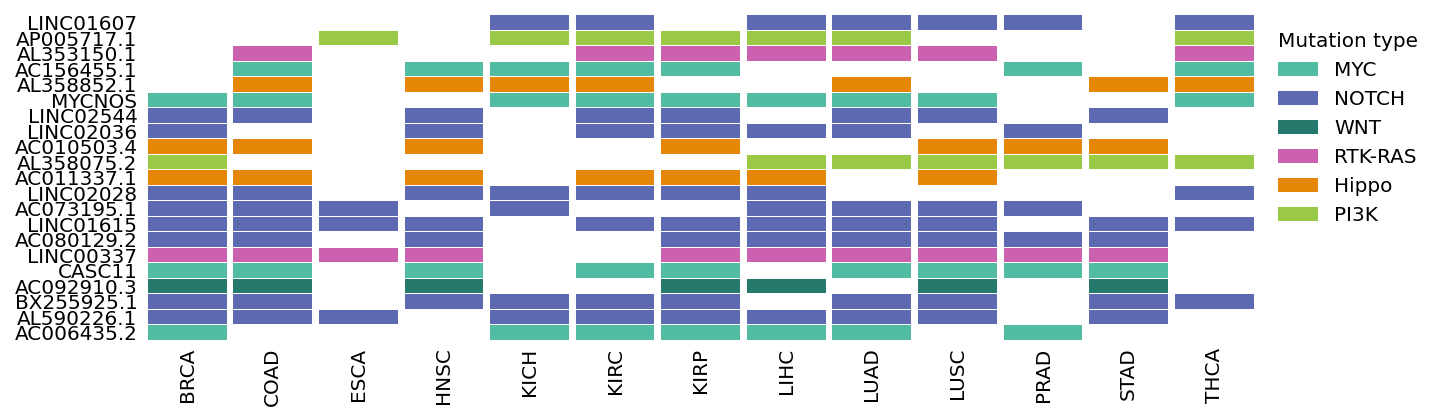

In [11]:
# add data to the CoMut object
example_comut.add_categorical_data(mutation_df_sorted, name = 'Mutation type')

# plot comut and add unified legend
example_comut.plot_comut(x_padding = x_padding, y_padding = y_padding, tri_padding = tri_padding, figsize = figsize)
example_comut.add_unified_legend()

In [35]:
mutation_df

,sample,category,value
